<a href="https://colab.research.google.com/github/josorio398/Hyperspectral_Images_Analysis/blob/main/Hyperspectral_Images_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Hyperspectal Images Analysis**

###  **Libraries**

**Spectral-libraries** The Spectral Library Tool software package is both a QGIS plugin and stand-alone python package that provides a suite of processing tools for multi- and hyperspectral spectral libraries.

The software is based on VIPER Tools: code written for ENVI/IDL and released in 2007. Several updates have been released since and now it has been ported to PyQGIS in the period 2017 - 2020. The original VIPER Tools is now split over two python/QGIS tools: Spectral Library Tools and MESMA.

**Matplotlib** is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.

**Numpy**  is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

**Pandas** is a software library written for the Python programming language for data manipulation and analysis.In particular, it offers data structures and operations for manipulating numerical tables and time series.

In [84]:
import spectral.io.envi as envi
import numpy as np
import pandas as pd
import wget
import os
import matplotlib.pyplot as plt

###  **Downloading files from the repository**

The files downloaded from github repository: https://github.com/josorio398/Hyperspectral_Images_Analysis

In [91]:
path_hdr = "hojas.hdr"
path_raw = "hojas.raw"

if os.path.exists(path_hdr) == False and os.path.exists(path_raw) == False:
    wget.download("https://raw.githubusercontent.com/josorio398/Hyperspectral_Images_Analysis/main/hojas.hdr")
    wget.download("https://raw.githubusercontent.com/josorio398/Hyperspectral_Images_Analysis/main/hojas.raw")

img = envi.open(path_hdr,path_raw)

###    **Image characteristics**

Characteristics of the image contained in the ENVI file.

In [87]:
h = envi.read_envi_header(path_hdr)
h

{'file type': 'ENVI Standard',
 'sensor type': 'MONARCH',
 'wavelength units': 'nm',
 'data type': '12',
 'interleave': 'BSQ',
 'byte order': '0',
 'bit depth': '10',
 'header offset': '0',
 'wavelength': ['713',
  '736',
  '759',
  '782',
  '805',
  '828',
  '851',
  '874',
  '897',
  '920'],
 'gain': ['1.0',
  '1.0',
  '1.0',
  '1.0',
  '1.0',
  '1.0',
  '1.0',
  '1.0',
  '1.0',
  '1.0'],
 'exposure time': ['66', '66', '66', '66', '66', '66', '66', '66', '66', '66'],
 'exposure type': ['radiometric-calibration'],
 'default bands': ['713'],
 'lines': '1024',
 'samples': '1280',
 'bands': '10'}

###  **Extract images**

Extract the images from the hdrm and raw file. 

In [89]:
wavelength  = h["wavelength"]
images = []

for i in wavelength:
    globals()["img_"+i] = img.read_band(wavelength.index(i))
    images.append("img_"+i)

###   **Show images**

The images are presented for each wavelength.

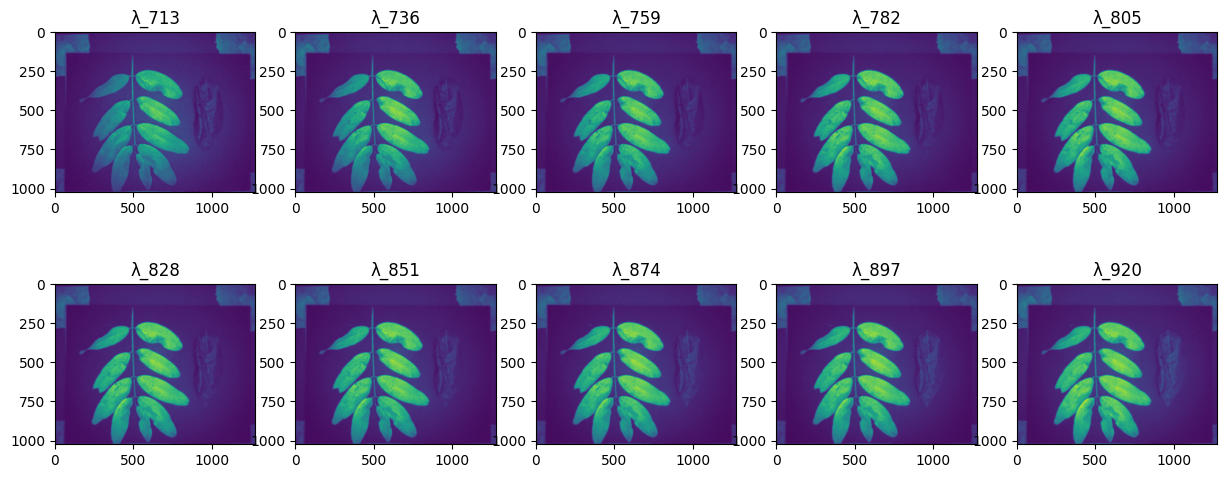

In [90]:
rows = 2
cols = 5

fig, axs = plt.subplots(rows, cols, figsize=(15, 6))

L_rows = cols*[0] + cols*[1]
L_cols = rows*list(range(cols))

for i in images :
    axs[L_rows[images.index(i)],L_cols[images.index(i)]].imshow(eval(i))
    axs[L_rows[images.index(i)],L_cols[images.index(i)]].set_title("λ"+i[3:])

###   **Unfolding**

Hyperspectral data files are usually called hypercubes due to the three-dimensional structure of their data.
However, many of the useful and established chemometric algorithms are designed to be performed on two-dimensional matrices rather than three-dimensional hypercubes.

In [101]:
array_data = []

for  i in images:
    col = eval(i).flatten()
    array_data.append(col)

data = np.stack(array_data, axis=1)
df = pd.DataFrame(data).set_axis(wavelength, axis=1)
df[400000:500000]

,713,736,759,782,805,828,851,874,897,920
400000,60,84,95,117,113,129,127,145,171,164
400001,56,86,92,107,112,123,134,154,155,157
400002,60,92,94,104,108,120,131,162,164,148
400003,44,80,88,108,100,116,124,144,152,172
400004,56,74,86,99,102,118,123,147,166,156
...,...,...,...,...,...,...,...,...,...,...
499995,44,72,92,96,104,120,112,140,148,140
499996,56,74,80,94,97,99,117,128,154,131
499997,51,72,71,93,100,103,126,140,136,138
499998,54,73,90,97,97,109,131,128,136,136


###   **Intensity and Wavelength per Pixel**

In [93]:
import plotly.graph_objects as go


fig = go.Figure()
for i in range(0,len(df),28000):
    fig.add_trace(go.Scatter(x =wavelength, y = df.iloc[i],name=f'Row_{i}'))

fig.update_layout(title='Change of Intensity per Pixel', xaxis_title='Wavelength',yaxis_title='Intensity')
fig.show()

In [67]:
img.shape

(1024, 1280, 10)

ImageView object:
  Display bands       :  [0]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 82.0]
    G: [0.0, 82.0]
    B: [0.0, 82.0]

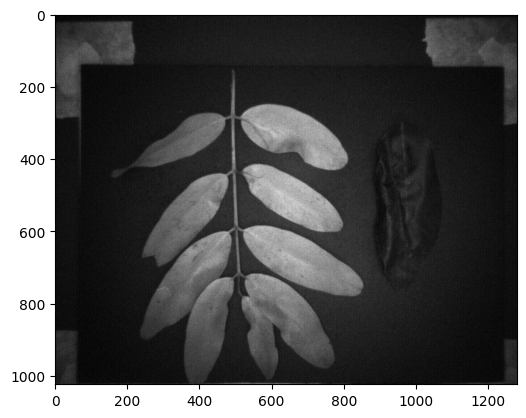

In [70]:
imshow(img.read_band(0))

ImageView object:
  Display bands       :  (0, 5, 9)
  Interpolation       :  nearest
  RGB data limits     :
    R: [0.0, 82.0]
    G: [0.0, 154.0]
    B: [0.0, 206.0]

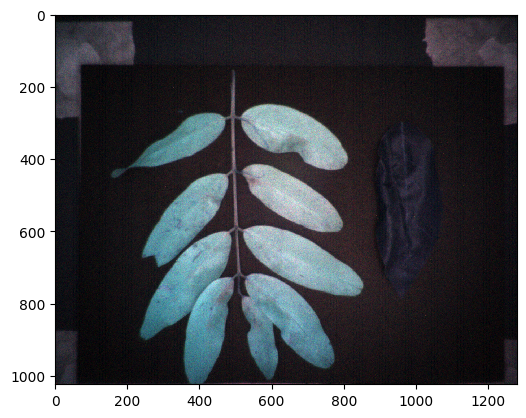

In [110]:
view = imshow(img,(0,5,9),interpolation="nearest")
view

In [92]:
img.shape

(1024, 1280, 10)